In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
data = pd.read_csv('housing.csv')

In [53]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [55]:
data.dropna(inplace = True)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [57]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [59]:
train_data = x_train.join(y_train)

In [60]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18394,-121.87,37.27,18.0,3561.0,560.0,1753.0,553.0,5.0292,<1H OCEAN,269400.0
6459,-118.04,34.10,39.0,2302.0,412.0,1590.0,406.0,4.8017,INLAND,273800.0
6134,-118.00,34.07,34.0,1696.0,456.0,1609.0,426.0,2.2500,INLAND,138500.0
5158,-118.28,33.96,42.0,1206.0,304.0,1167.0,250.0,1.6150,<1H OCEAN,101300.0
18579,-121.77,36.93,33.0,1406.0,317.0,1075.0,301.0,3.2813,<1H OCEAN,190000.0
...,...,...,...,...,...,...,...,...,...,...
5732,-118.19,34.16,49.0,1788.0,267.0,735.0,266.0,6.6009,<1H OCEAN,375700.0
8780,-118.32,33.79,35.0,2924.0,658.0,1675.0,602.0,3.8287,<1H OCEAN,279900.0
2794,-117.90,36.95,19.0,99.0,26.0,51.0,22.0,1.7292,INLAND,137500.0
15609,-116.91,32.73,8.0,4630.0,624.0,2048.0,575.0,6.4745,<1H OCEAN,300300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

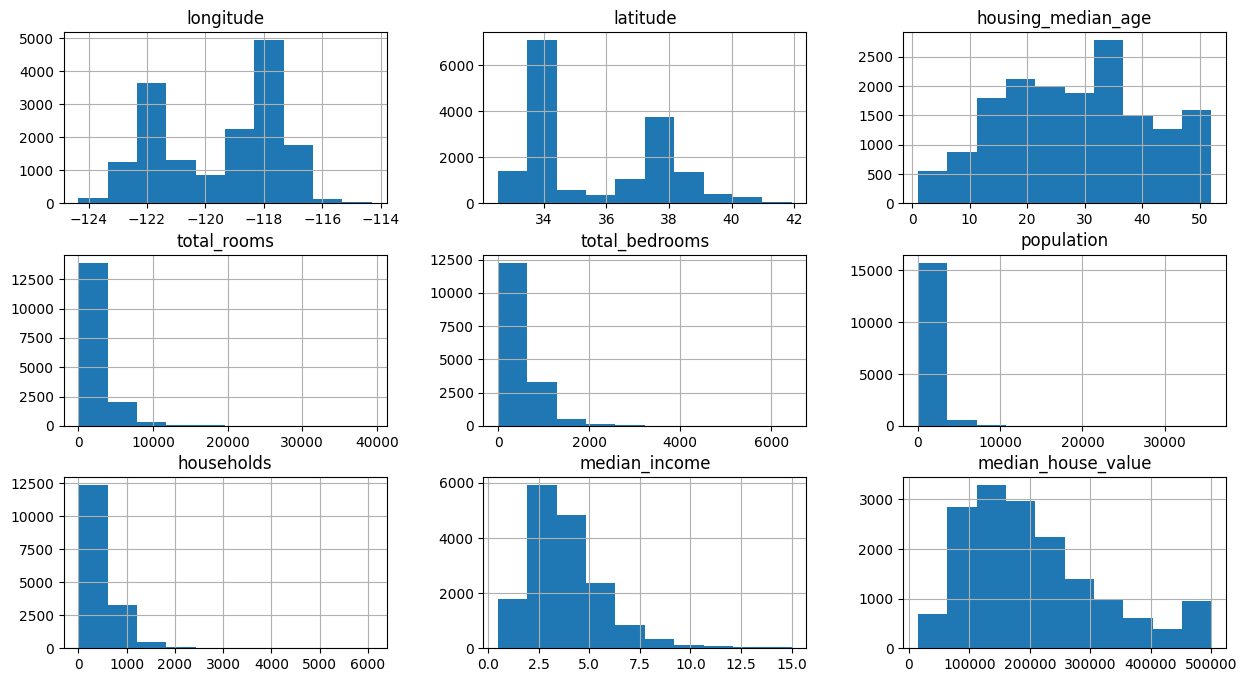

In [61]:
train_data.hist(figsize = (15,8))

In [62]:
print(train_data.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')


In [63]:
train_data.ocean_proximity.value_counts()


ocean_proximity
<1H OCEAN     7195
INLAND        5189
NEAR OCEAN    2133
NEAR BAY      1825
ISLAND           4
Name: count, dtype: int64

In [64]:
dummies = pd.get_dummies(train_data['ocean_proximity'], prefix='', prefix_sep='')
dummies = dummies.astype(int)

In [65]:
train_data = train_data.join(dummies)

In [66]:
train_data.drop('ocean_proximity', axis=1, inplace=True)

In [67]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18394,-121.87,37.27,18.0,3561.0,560.0,1753.0,553.0,5.0292,269400.0,1,0,0,0,0
6459,-118.04,34.10,39.0,2302.0,412.0,1590.0,406.0,4.8017,273800.0,0,1,0,0,0
6134,-118.00,34.07,34.0,1696.0,456.0,1609.0,426.0,2.2500,138500.0,0,1,0,0,0
5158,-118.28,33.96,42.0,1206.0,304.0,1167.0,250.0,1.6150,101300.0,1,0,0,0,0
18579,-121.77,36.93,33.0,1406.0,317.0,1075.0,301.0,3.2813,190000.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5732,-118.19,34.16,49.0,1788.0,267.0,735.0,266.0,6.6009,375700.0,1,0,0,0,0
8780,-118.32,33.79,35.0,2924.0,658.0,1675.0,602.0,3.8287,279900.0,1,0,0,0,0
2794,-117.90,36.95,19.0,99.0,26.0,51.0,22.0,1.7292,137500.0,0,1,0,0,0
15609,-116.91,32.73,8.0,4630.0,624.0,2048.0,575.0,6.4745,300300.0,1,0,0,0,0


<Axes: >

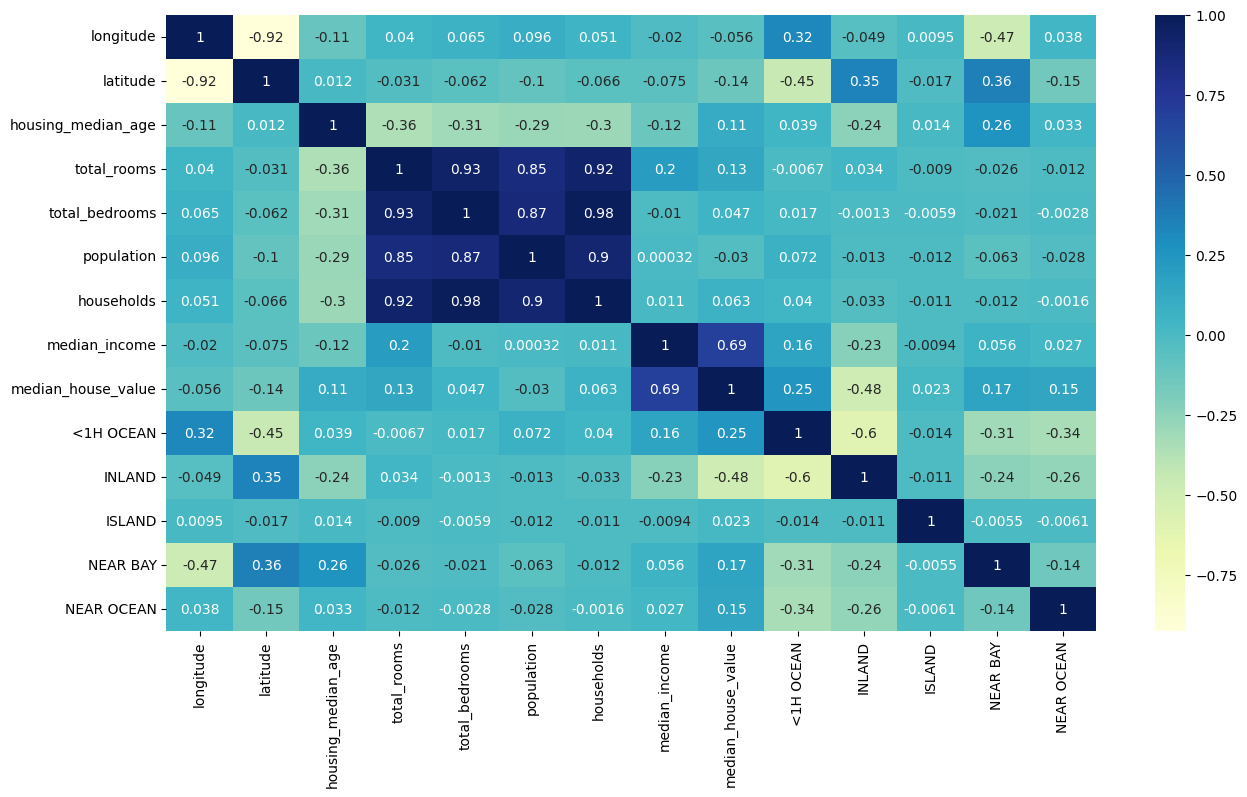

In [68]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

In [69]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

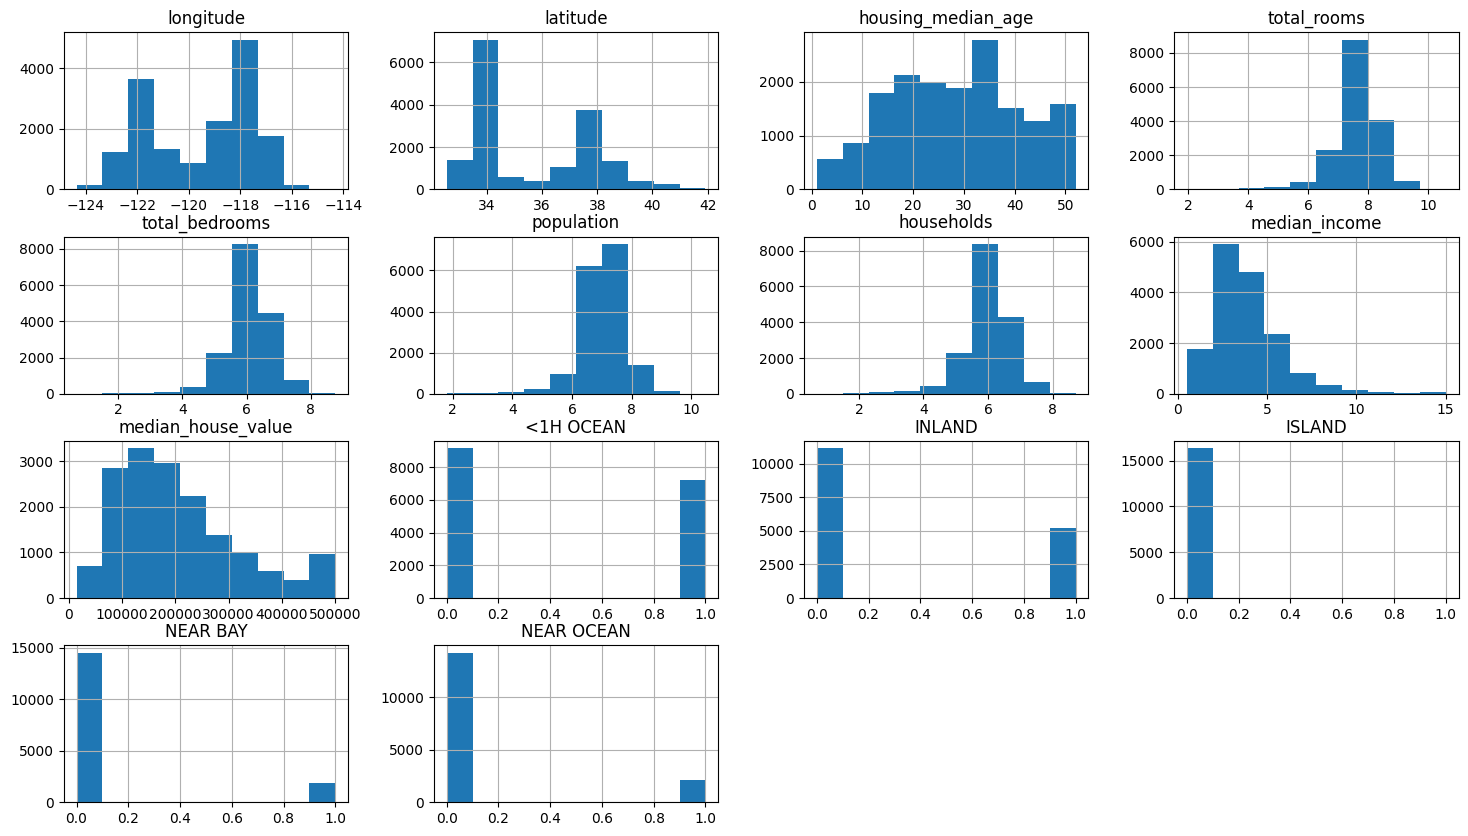

In [70]:
train_data.hist(figsize = (18,10))

<Axes: xlabel='latitude', ylabel='longitude'>

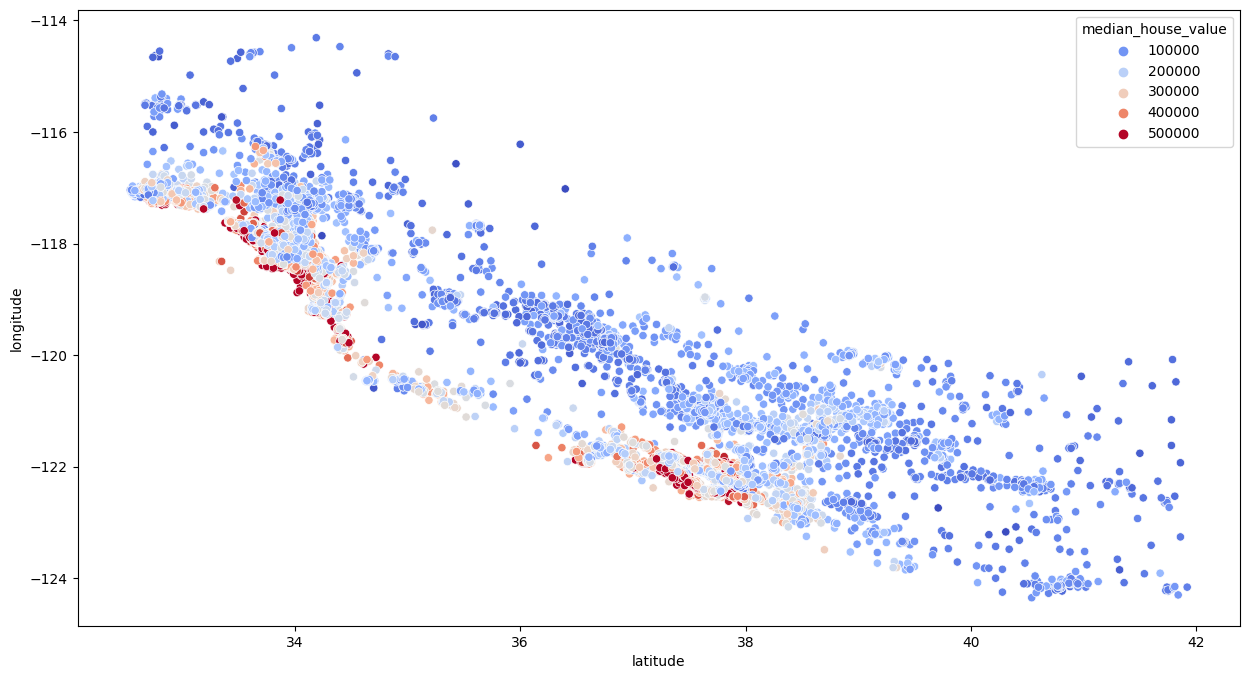

In [71]:
plt.figure(figsize=(15,8))
sns.scatterplot(x ='latitude', y = 'longitude', data = train_data, hue = 'median_house_value', palette = 'coolwarm')


In [72]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

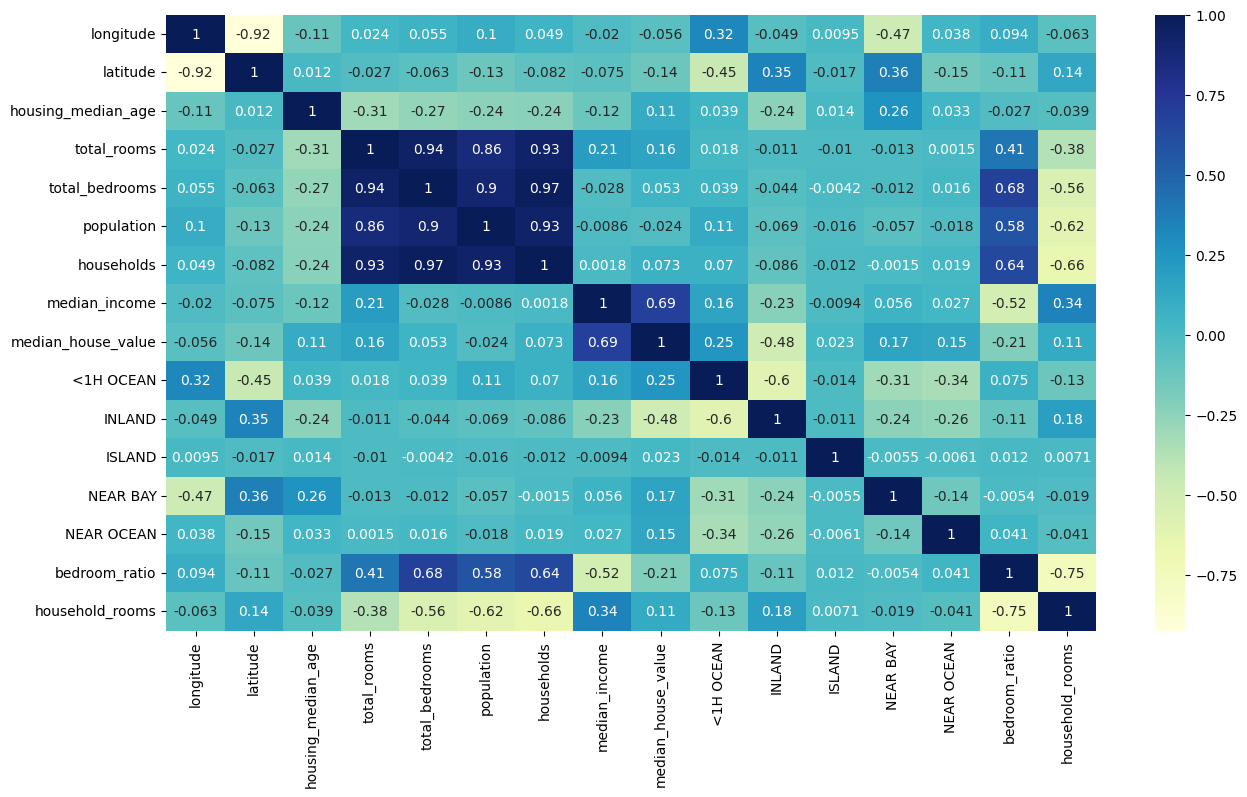

In [73]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

In [74]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [75]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

dummies = pd.get_dummies(test_data['ocean_proximity'], prefix='', prefix_sep='')
dummies = dummies.astype(int)
test_data = test_data.join(dummies)
test_data.drop('ocean_proximity', axis=1, inplace=True)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']


In [76]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [77]:
reg.score(x_test, y_test)

0.6736221611011077